In [1]:

import pandas as pd


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [5]:
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
df.shape

(1599, 12)

# observation
<b>dataset consists of 1599 observations/rows and 12 features/columns</b>
<b>out of 12 , one of the column is the target variable and 11 are input variables</b>

In [7]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [8]:
df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [9]:
df.columns.unique()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# Observations:
## key insights:

- Target variable/Dependent variable is discrete and categorical in nature.
- “quality” score scale ranges from 1 to 10; 1 being poor and 10 being the best.
- 1,2,9 & 10 Quality ratings are not given by any observation. Only scores obtained are between 3 to 8.

# Frequency Counts of each Quality Value

In [11]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Observations
- shows the vote count of each quality score in descending order
- "Quality" has most values concentrated in the categories 5, 6, 7
- few observations appeared in 3 & 8

# 3. Renaming Columns for better structure-ability
- replacing the space in-between with the underscore for better readability

In [12]:
df.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual-sugar', 'free sulfur dioxide': 'free-sulfur-dioxide', 'total sulfur dioxide': 'total-sulfur-dioxide'}, inplace = True)

In [13]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual-sugar',
       'chlorides', 'free-sulfur-dioxide', 'total-sulfur-dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Checking for Missing Values
## observation
- there is no missing values in any of the columns

In [14]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual-sugar          0
chlorides               0
free-sulfur-dioxide     0
total-sulfur-dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Information about the dataframe
 - includes the data types in various columns
 - number of null values in each column
 - memory use of the entire dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual-sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free-sulfur-dioxide   1599 non-null   float64
 6   total-sulfur-dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Observation
- there is only float and integer values
- no missing values available

# checking for duplicates:
- duplicates could or could not affect the quality of the data
- before removing the duplicates if there is any
- it is important to understand the reason of their occurrence in the first place

In [16]:
duplicated_entries = df[df.duplicated()]

In [17]:
duplicated_entries.shape

(240, 12)

# Observation
- there are 240 duplicate entries
- the quality ratings for the same/similar wine were given by individual wine tasters
- thus, there is a possibility of similar reviews
- hence, we can keep the duplicates

# data visualizations for graphical analysis
- first the target variable and input variables are separated
- y is the target variable(quality)
- x is the input variable containing all the features bar quality

In [20]:
y = df.quality                      # set quality as target variable (y)
x = df.drop('quality', axis=1)      #  all columns bar quality are input variable (x)


array([[<AxesSubplot:title={'center':'fixed_acidity'}>,
        <AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'citric_acid'}>],
       [<AxesSubplot:title={'center':'residual-sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free-sulfur-dioxide'}>],
       [<AxesSubplot:title={'center':'total-sulfur-dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

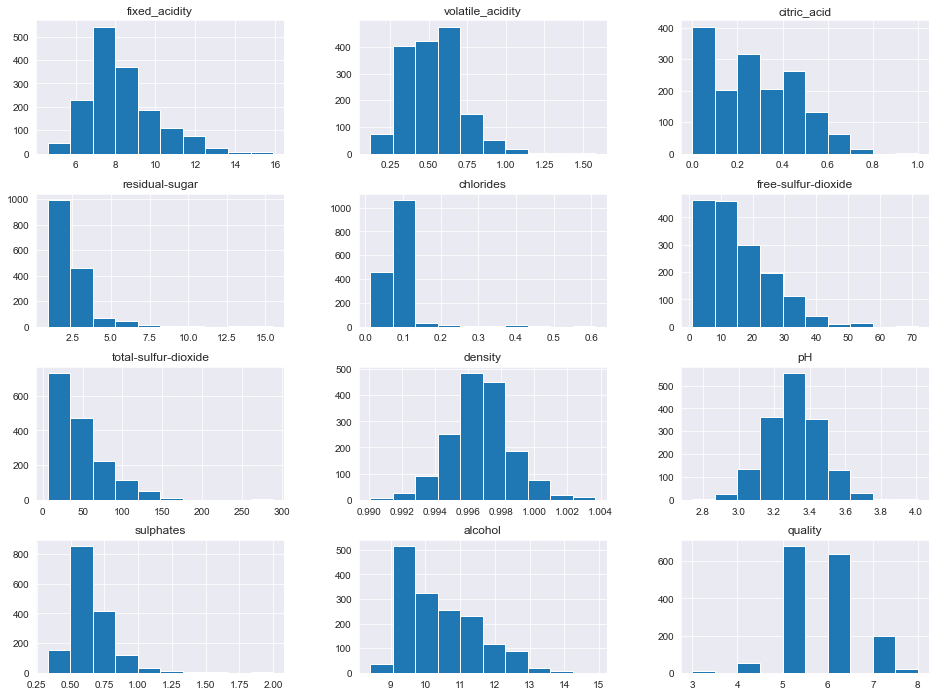

In [22]:
df.hist(bins=10, figsize=(16, 12))

# observation:
- attributes 'density' and 'ph' are normally distributed
- the distribution of alcohol is positively skewed meaning the curve is shifted towards the left
- the quality attribute shows that most of the wines are of average quality (rating of 5 to 7) than bad quality wine (1-4) or good quality wine (8-10)


In [24]:
df.corr()      # Correlation


fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.256131     0.671703   
volatile_acidity          -0.256131          1.000000    -0.552496   
citric_acid                0.671703         -0.552496     1.000000   
residual-sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free-sulfur-dioxide       -0.153794         -0.010504    -0.060978   
total-sulfur-dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual-sugar  chlorides  free-sulfur-dioxide  \
fixed_acidity               0.114777   0.093705            -0.153794   
volatile_acidity            0.001918   0.061298            -0.010504   
citric_acid                 0.143577   0.203823            -0.060978   
residual-sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free-sulfur-dioxide         0.187049   0.005562             1.000000   
total-sulfur-dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total-sulfur-dioxide   density        pH  sulphates  \
fixed_acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile_acidity                  0.076470  0.022026  0.234937  -0.260987   
citric_acid                       0.035533  0.364947 -0.541904   0.312770   
residual-sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free-sulfur-dioxide               0.667666 -0.021946  0.070377   0.051658   
total-sulfur-dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed_acidity        -0.061668  0.124052  
volatile_acidity     -0.202288 -0.390558  
citric_acid           0.109903  0.226373  
residual-sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free-sulfur-dioxide  -0.069408 -0.050656  
total-sulfur-dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

# Correlation Matrix with Heatmap
- creating a pictorial visualisation of the above correlation using a heatmap helps in better understanding
- using seaborn's heatmap function to achieve this

<AxesSubplot:>

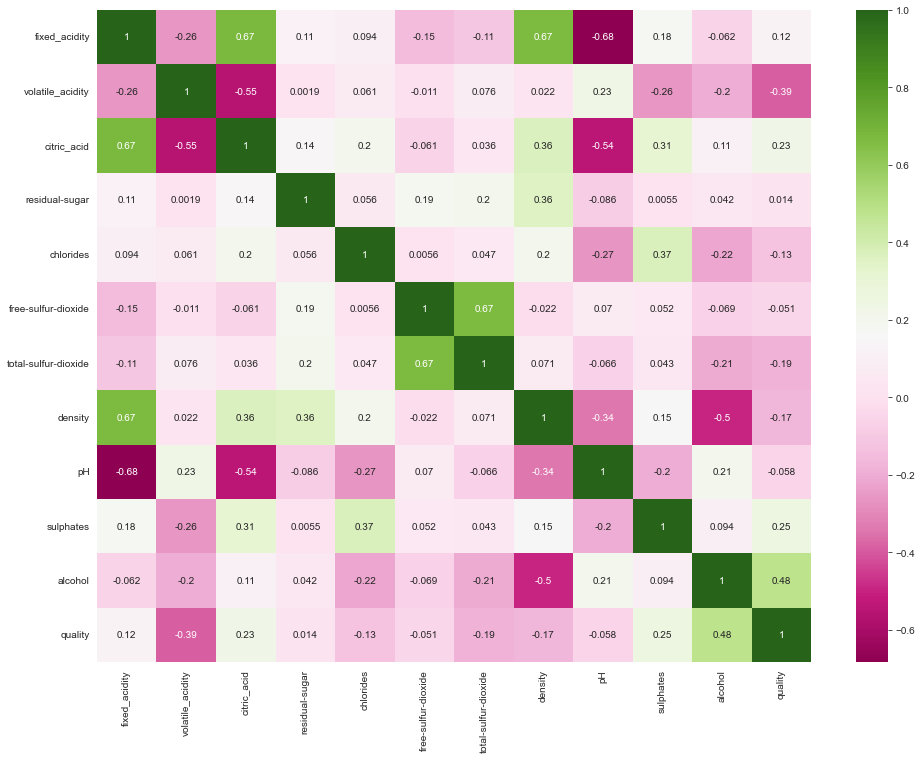

In [30]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap='PiYG', annot=True )     # PiYG  bwr

<AxesSubplot:>

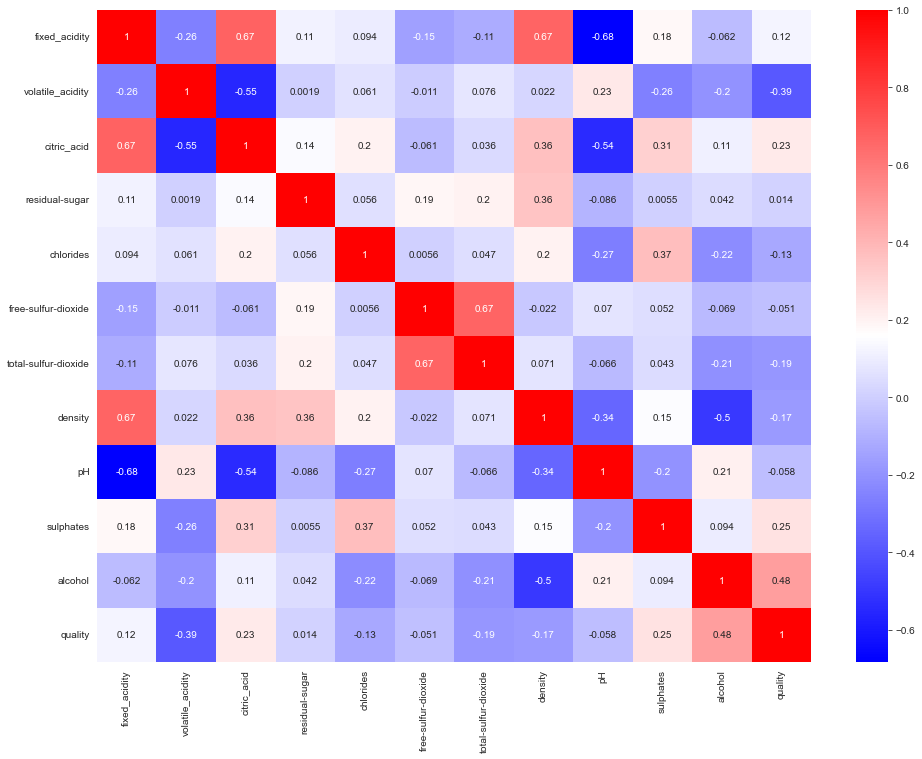

In [33]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap='bwr', annot=True )

# observation
- Alcohol has the highest positive correlation to quality, followed by sulphates and other attributes such as citric acid
- there is a significantly high positive correlation between fixed_acidity, citric acid and density
- there is a high negative correlation between fixed_acidity and ph
- A high negative correlation between volatile acidity and citric acid
- Density has positive correlation with fixed acidity but it has negative correlation with alcohol
- citric acid and volatile acid have negative correlation
- free sulhpur dioxide and total sulphur dioxide has positive correlation

# count plot
- attribute quality is categorical in nature
- it can be visualized with bar plot or count plot to get the graphical representation
- which shows the number of occurrence or frequency for each categorical data using bars

C:\Users\jason\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

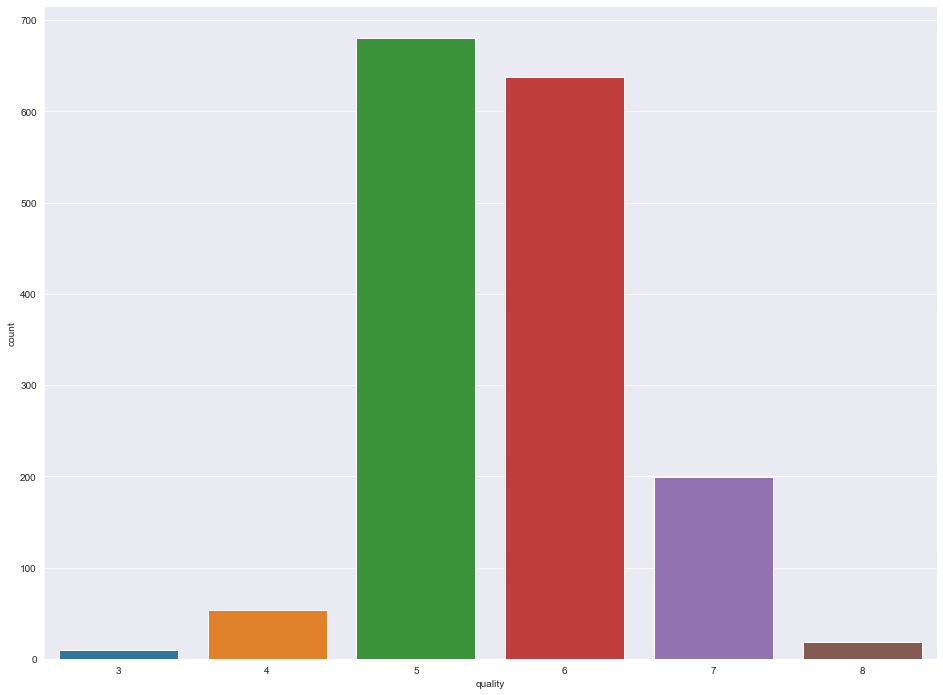

In [34]:
plt.figure(figsize=(16, 12))
sns.countplot(df.quality)

# observation
- <b>The average wine(5-7) are more prominent than bad (1-4) and good (8-10) quality wines.</b>

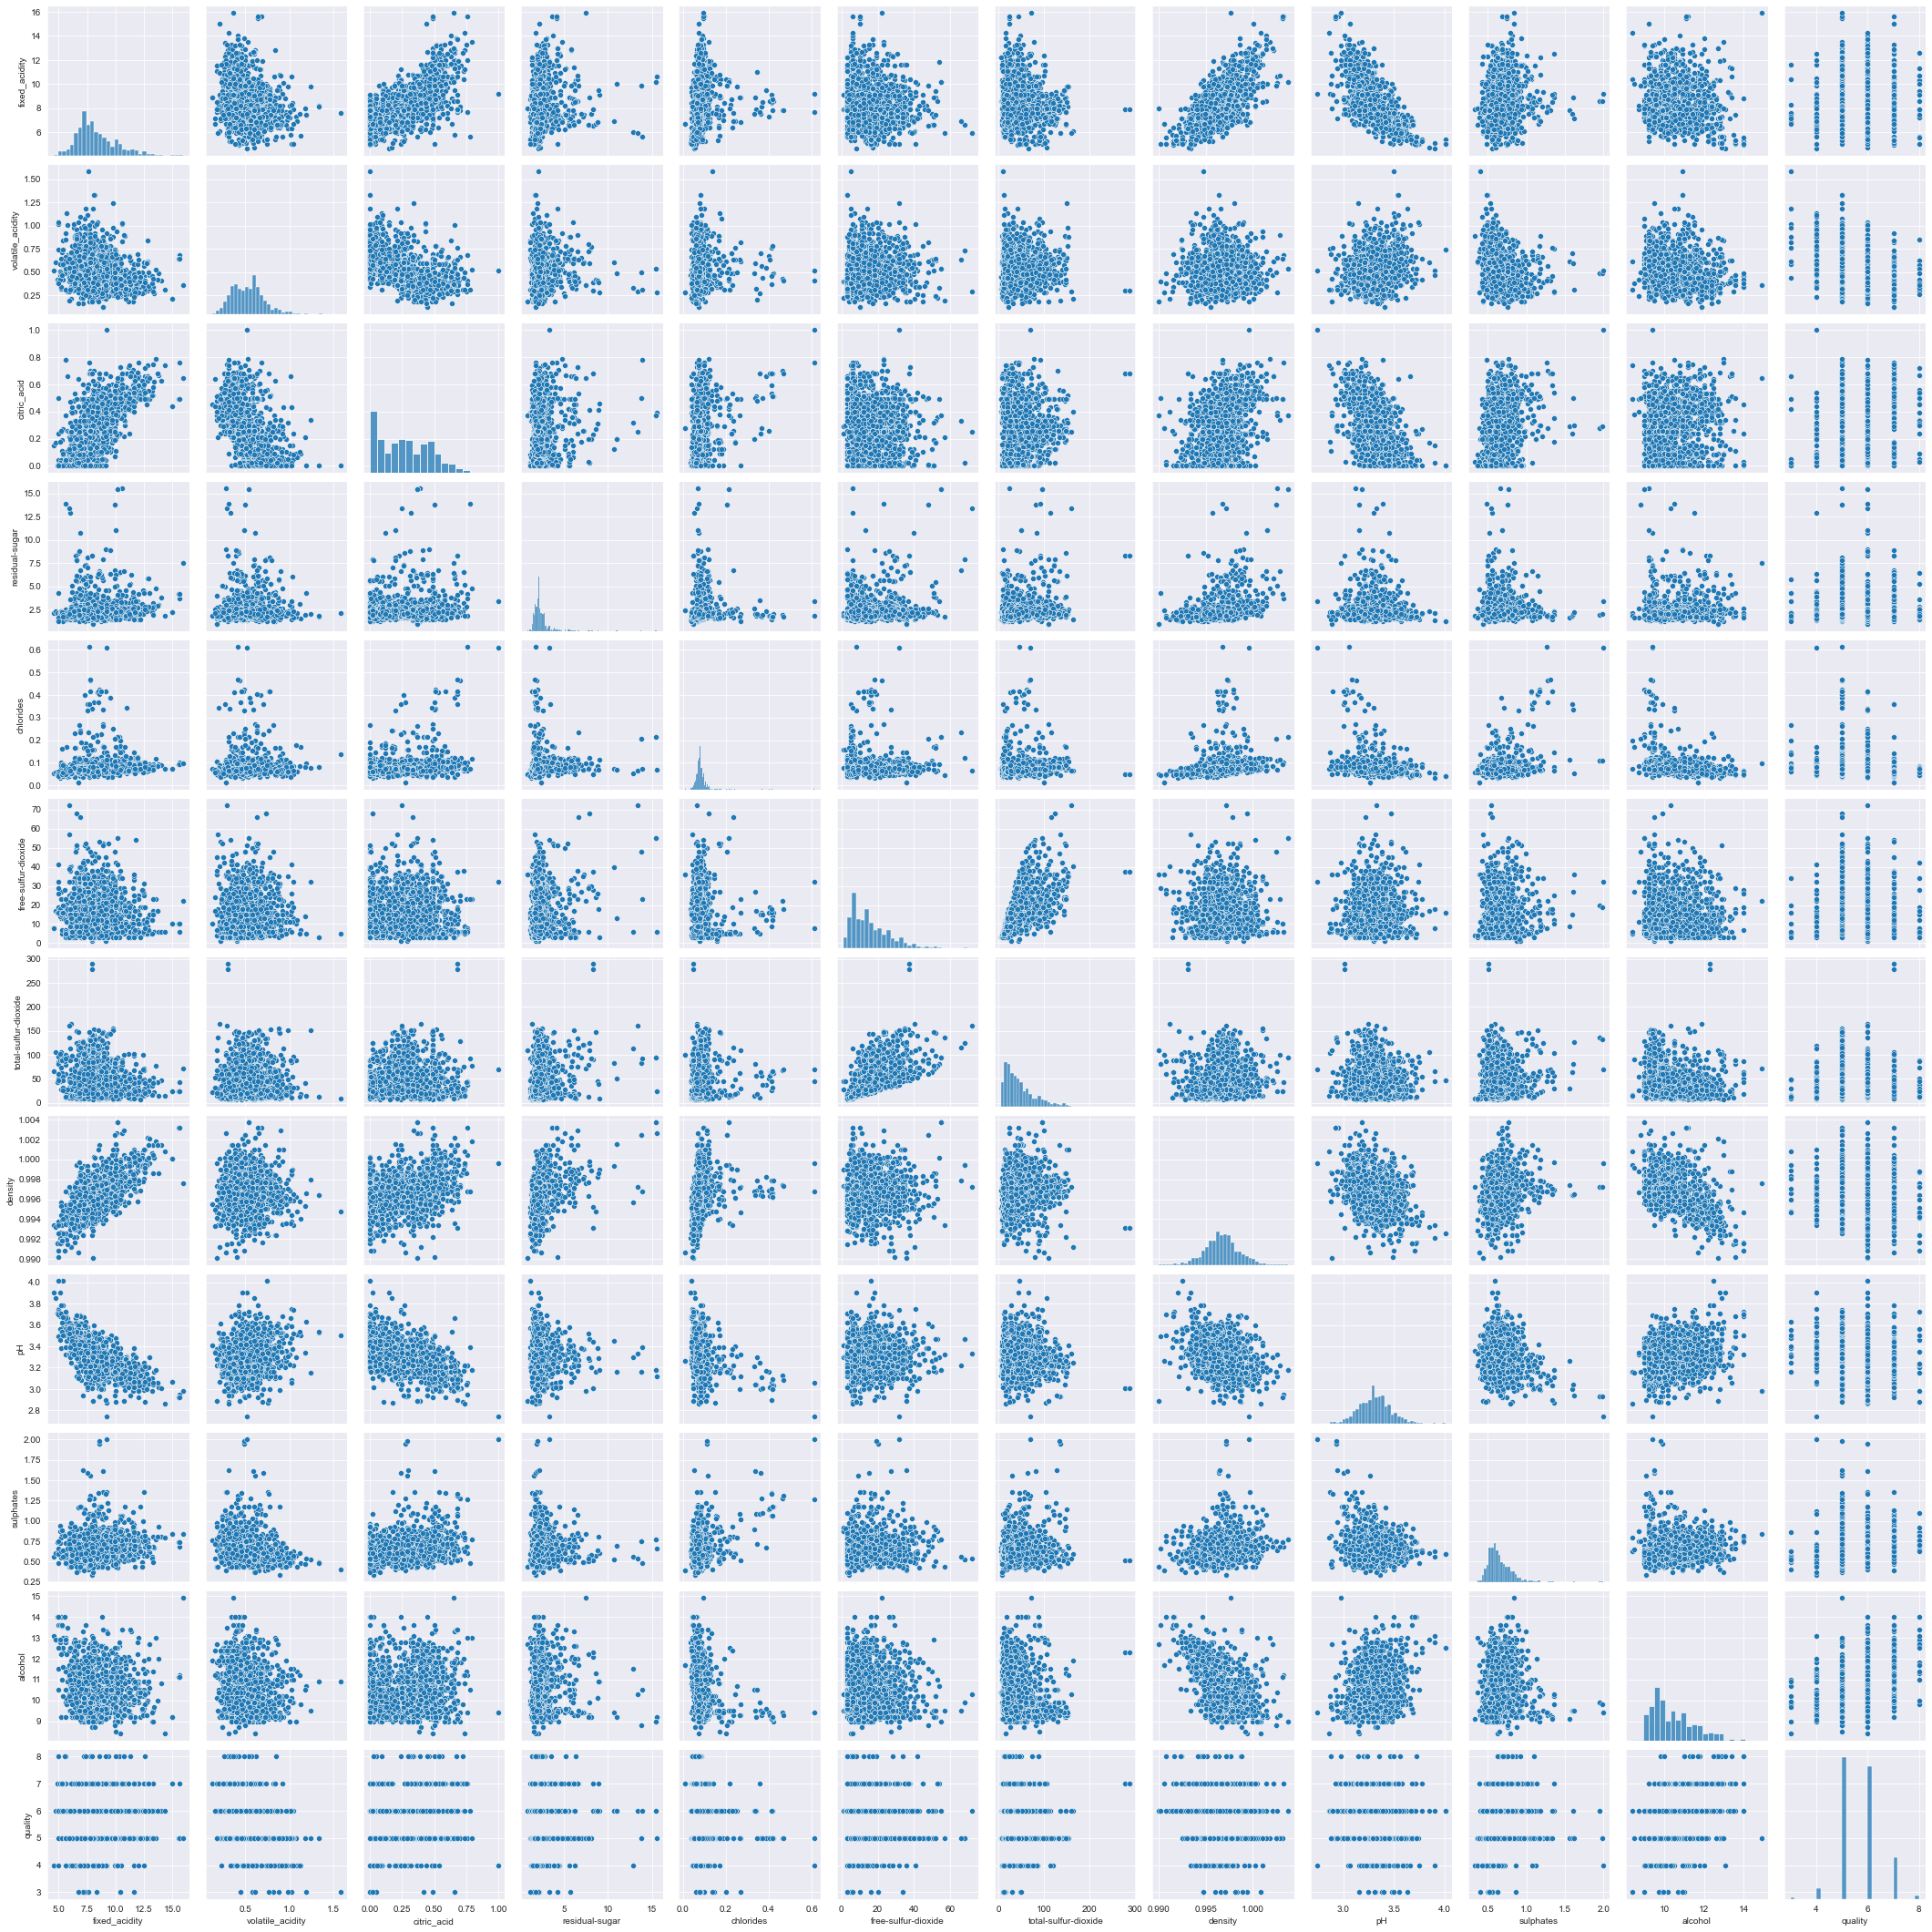

In [35]:
plt.figure(figsize=(16, 12))
sns.pairplot(df)

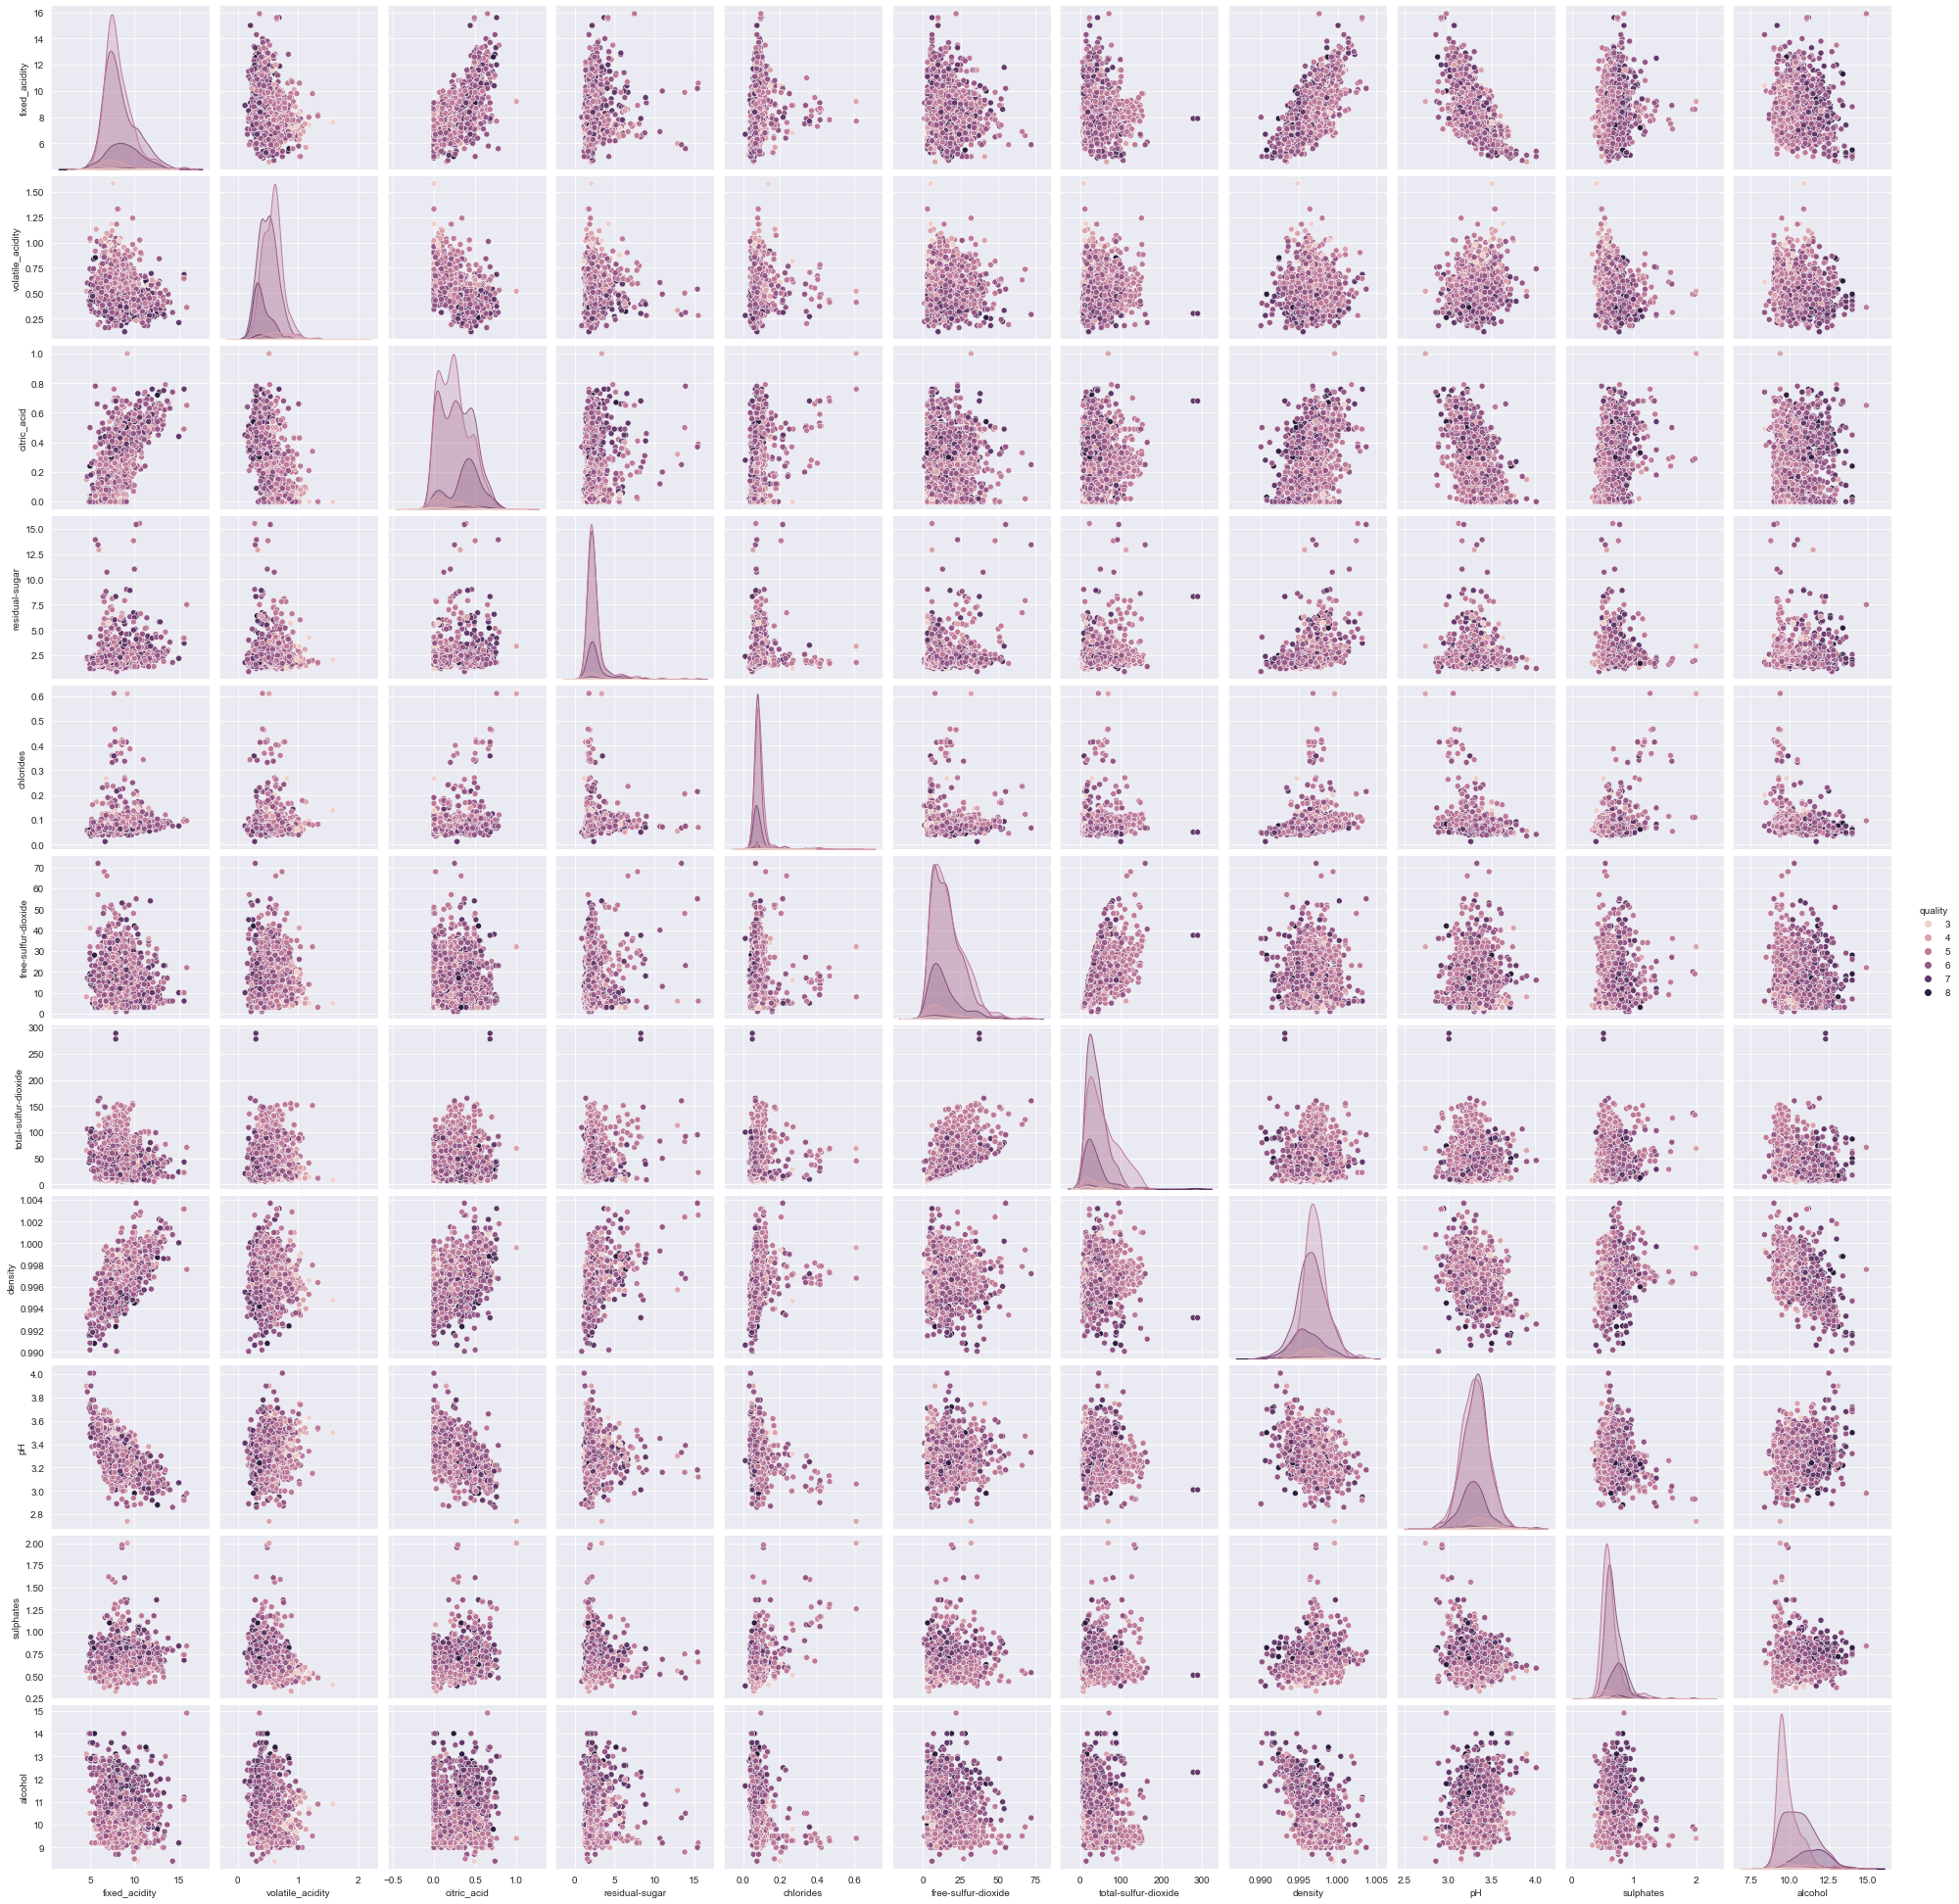

In [39]:
sns.pairplot(df)

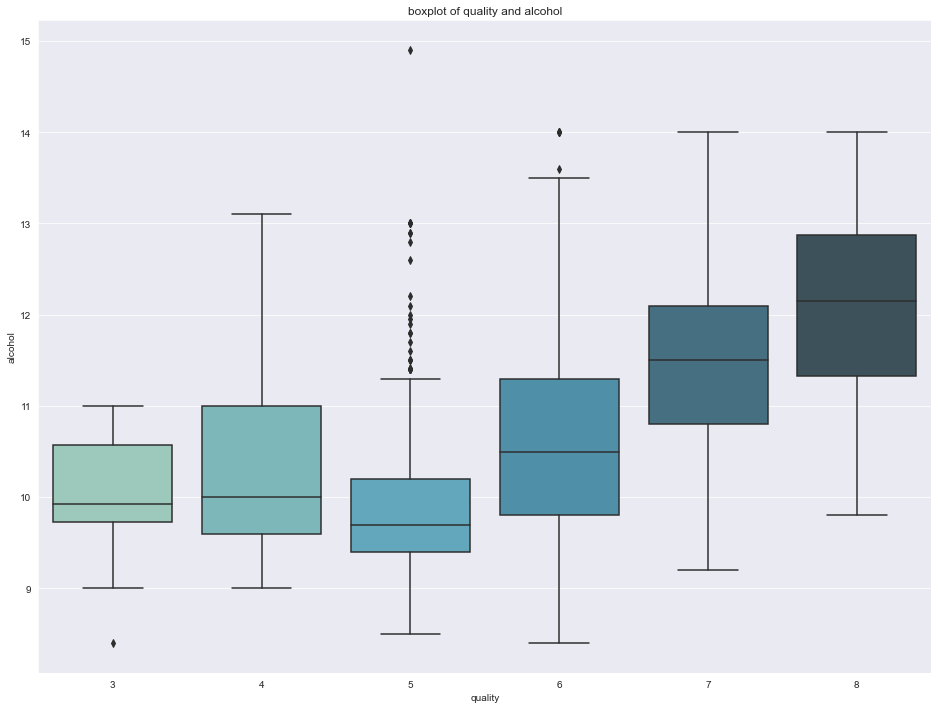

In [41]:
# box plot
plt.figure(figsize=(16, 12))
sns.boxplot(x = df.quality, y = df.alcohol, palette='GnBu_d')
plt.title('boxplot of quality and alcohol')
plt.show()

# observation
- the quality of the wine increases with the increase in alcohol
- the quality of the wine is directly related to the amount of alcohol in it
- the points lying outside the whiskers or the lines extending from the retangular box are the outliers


In [70]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv')

In [71]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [72]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [73]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [74]:
titanic_data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [75]:
titanic_data['Fare'].isna().sum()

0

In [76]:
titanic_data[titanic_data['Sex'] == 'male'].count()

PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            453
SibSp          577
Parch          577
Ticket         577
Fare           577
Cabin          107
Embarked       577
dtype: int64

In [88]:
total_survived = titanic_data[titanic_data['Survived'] == 1].count()
total_survived.Survived

342

In [79]:
total_died = titanic_data[titanic_data['Survived'] == 0].count()
total_died

PassengerId    549
Survived       549
Pclass         549
Name           549
Sex            549
Age            424
SibSp          549
Parch          549
Ticket         549
Fare           549
Cabin           68
Embarked       549
dtype: int64

In [85]:
total_pop = titanic_data['Fare'].count()
total_pop

891

In [93]:
survival_proportion= total_survived.Survived /  total_pop

In [96]:
survival_proportion

0.3838383838383838

In [97]:
round(survival_proportion,2)

0.38

In [129]:
survived_population = titanic_data[titanic_data['Survived'] == 1]['Sex'].value_counts()
survived_population

female    233
male      109
Name: Sex, dtype: int64

In [132]:
titanic_data[titanic_data['Survived'] == 1]['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [133]:
titanic_data[titanic_data['Survived'] == 1]['Parch'].value_counts()

0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

In [134]:
titanic_data[titanic_data['Survived'] == 1]['Embarked'].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [135]:
titanic_data['Fare'].values

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
         8.05  ,  31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,
        18.    ,   7.225 ,  26.    ,  13.    ,   8.0292,  35.5   ,
        21.075 ,  31.3875,   7.225 , 263.    ,   7.8792,   7.8958,
        27.7208, 146.5208,   7.75  ,  10.5   ,  82.1708,  52.    ,
         7.2292,   8.05  ,  18.    ,  11.2417,   9.475 ,  21.    ,
         7.8958,  41.5792,   7.8792,   8.05  ,  15.5   ,   7.75  ,
        21.6792,  17.8   ,  39.6875,   7.8   ,  76.7292,  26.    ,
        61.9792,  35.5   ,  10.5   ,   7.2292,  27.75  ,  46.9   ,
         7.2292,  80.    ,  83.475 ,  27.9   ,  27.7208,  15.2458,
        10.5   ,   8.1583,   7.925 ,   8.6625,  10.5   ,  46.9   ,
        73.5   ,  14.4542,  56.4958,   7.65  ,   7.8958,   8.05  ,
        29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,  47.1   ,
        10.5   ,  15.85  ,  34.375 ,   8.05  , 263.    ,   8.0

In [138]:

titanic_data.sort_values(by=['Fare'], ).head(5)

PassengerId  Survived  Pclass                             Name   Sex  \
271          272         1       3     Tornquist, Mr. William Henry  male   
597          598         0       3              Johnson, Mr. Alfred  male   
302          303         0       3  Johnson, Mr. William Cahoone Jr  male   
633          634         0       1    Parr, Mr. William Henry Marsh  male   
277          278         0       2      Parkes, Mr. Francis "Frank"  male   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
271  25.0      0      0    LINE   0.0   NaN        S  
597  49.0      0      0    LINE   0.0   NaN        S  
302  19.0      0      0    LINE   0.0   NaN        S  
633   NaN      0      0  112052   0.0   NaN        S  
277   NaN      0      0  239853   0.0   NaN        S

In [139]:
titanic_data['Fare'].nlargest(5)

258    512.3292
679    512.3292
737    512.3292
27     263.0000
88     263.0000
Name: Fare, dtype: float64

In [140]:
titanic_data[titanic_data['Survived'] == 1]['SibSp'].value_counts()

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

In [141]:
titanic_data[titanic_data['Survived'] == 1]['Age'].value_counts()

24.00    15
36.00    11
35.00    11
27.00    11
22.00    11
         ..
55.00     1
32.50     1
12.00     1
0.92      1
47.00     1
Name: Age, Length: 65, dtype: int64